**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 1](#toc1_)    
  - [Summarized Table of Contents](#toc1_1_)    
  - [Before Starting](#toc1_2_)    
  - [Introduction](#toc1_3_)    
  - [**1. Data Preparation**](#toc1_4_)    
  - [**1.1 Load data**](#toc1_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_1_1_1_)    
    - [**1.2 Save data**](#toc1_5_2_)    
    - [**1.3 Exploratory data analysis (EDA)**](#toc1_5_3_)    
  - [**2. Feature engineering**](#toc1_6_)    
    - [Using Bag of Words](#toc1_6_1_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_6_1_1_1_)    
  - [**3. Model**](#toc1_7_)    
    - [**3.1 Decision Trees**](#toc1_7_1_)    
  - [**4. Results Evaluation**](#toc1_8_)    
        - [**>>> Exercise 3 (Take home):**](#toc1_8_1_1_1_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_8_1_1_2_)    
        - [**>>> Exercise 5 (Take home):**](#toc1_8_1_1_3_)    
  - [**5. Other things you can try**](#toc1_9_)    
  - [**6. Deep Learning**](#toc1_10_)    
    - [**6.1 Prepare data (X, y)**](#toc1_10_1_)    
    - [**6.2 Deal with categorical label (y)**](#toc1_10_2_)    
    - [**6.3 Build model**](#toc1_10_3_)    
    - [**6.4 Train**](#toc1_10_4_)    
    - [**6.5 Predict on testing data**](#toc1_10_5_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_10_5_1_1_)    
    - [Note](#toc1_10_6_)    
    - [More Information for your reference](#toc1_10_7_)    
  - [**7. Word2Vector**](#toc1_11_)    
    - [**7.1 Prepare training corpus**](#toc1_11_1_)    
    - [**7.2 Training our model**](#toc1_11_2_)    
    - [**7.3 Generating word vector (embeddings)**](#toc1_11_3_)    
    - [**7.4 Using a pre-trained w2v model**](#toc1_11_4_)    
      - [(1) Download model by yourself](#toc1_11_4_1_)    
      - [(2) Using gensim api](#toc1_11_4_2_)    
    - [**7.5 king + woman - man = ?**](#toc1_11_5_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_11_5_1_1_)    
  - [**8. Clustering: k-means**](#toc1_12_)    
      - [Basic concept](#toc1_12_1_1_)    
  - [**9. High-dimension Visualization: t-SNE and UMAP**](#toc1_13_)    
    - [**9.1 Prepare visualizing target**](#toc1_13_1_)    
    - [**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc1_13_2_)    
        - [**>>> Exercise 8 (Take home):**](#toc1_13_2_1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 1](#toc0_)
In this lab's phase 1 session we will focus on the use of Neural Word Embeddings

## <a id='toc1_1_'></a>[Summarized Table of Contents](#toc0_)
- **Phase 1:**
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization


## <a id='toc1_2_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## <a id='toc1_3_'></a>[Introduction](#toc0_)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](./pics/pic0.png)

---
## <a id='toc1_4_'></a>[**1. Data Preparation**](#toc0_)

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

---
## <a id='toc1_5_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [3]:
anger_train.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [5]:
train_df

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896
...,...,...,...,...
3608,40781,@VivienLloyd Thank you so much! Just home - st...,sadness,0.104
3609,40782,Just put the winter duvet on ☃️❄️🌬☔️,sadness,0.104
3610,40783,@SilkInSide @TommyJoeRatliff that's so pretty!...,sadness,0.088
3611,40784,@BluesfestByron second artist announcement loo...,sadness,0.083


In [8]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [9]:
test_df.head()

,id,text,emotion,intensity
0,10857,@ZubairSabirPTI pls dont insult the word 'Molna',anger,0.479
1,10858,@ArcticFantasy I would have almost took offens...,anger,0.458
2,10859,@IllinoisLoyalty that Rutgers game was an abom...,anger,0.562
3,10860,@CozanGaming that's what lisa asked before she...,anger,0.500
4,10861,Sometimes I get mad over something so minuscul...,anger,0.708


In [10]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [11]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
##### <a id='toc1_5_1_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [15]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import plotly as py
import math
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hax16\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['the' 'to' 'and' 'you' 'of' 'is' 'it' 'in' 'that' 'my' 'for' 'on' 'be'
 'me' 'this' 'so' 'have' 'not' 'just' 'but' 'with' 'at' 'can' 'like' 'all'
 'are' 'your' 'was' 'when' 'if']
[1736 1289  955  796  793  787  717  626  537  535  446  390  383  380
  350  328  312  303  301  293  288  269  257  243  243  231  229  228
  226  216]


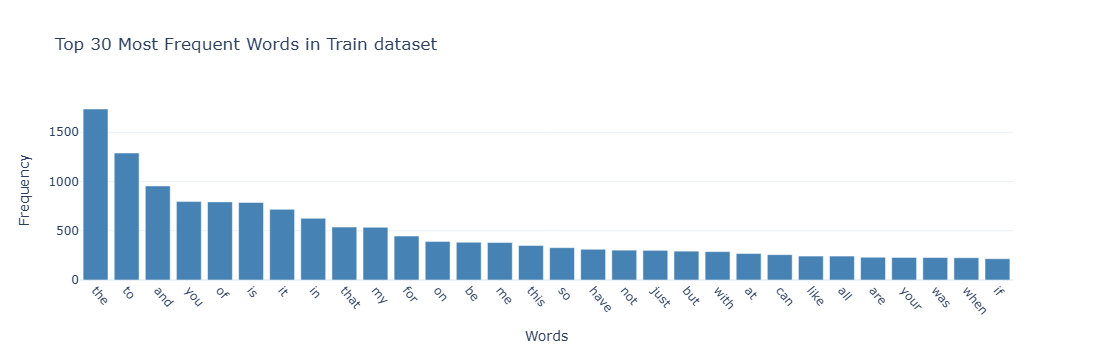

In [62]:
# Answer here

# Get the word frequencies in train dataset
count_vect = CountVectorizer()
train_df_counts = count_vect.fit_transform(train_df.text)
train_word_frequencies = np.asarray(train_df_counts.sum(axis=0))[0]

sorted_train_index = np.argsort(train_word_frequencies)[::-1][:30]
top30_words_train = count_vect.get_feature_names_out()[sorted_train_index]
top30_counts_train = train_word_frequencies[sorted_train_index]
print (top30_words_train)
print (top30_counts_train)

#Plot the word frequency
import plotly.express as px
fig = px.bar(x = top30_words_train, y = top30_counts_train, 
    title=f"Top 30 Most Frequent Words in Train dataset", labels={'x': 'Words', 'y': 'Frequency'})
fig.update_traces(marker_color="steelblue", textposition="outside")
fig.update_layout(xaxis_tickangle=50, template="plotly_white")
fig.show()

['the' 'to' 'and' 'it' 'of' 'you' 'is' 'in' 'for' 'that' 'my' 'on' 'be'
 'me' 'was' 'so' 'can' 'at' 'have' 'all' 'just' 'are' 'with' 'but' 'get'
 'your' 'up' 'this' 'like' 'not']
[153 138  92  83  83  82  77  69  57  55  52  46  40  36  34  34  32  30
  30  30  29  29  29  26  26  24  24  24  24  24]


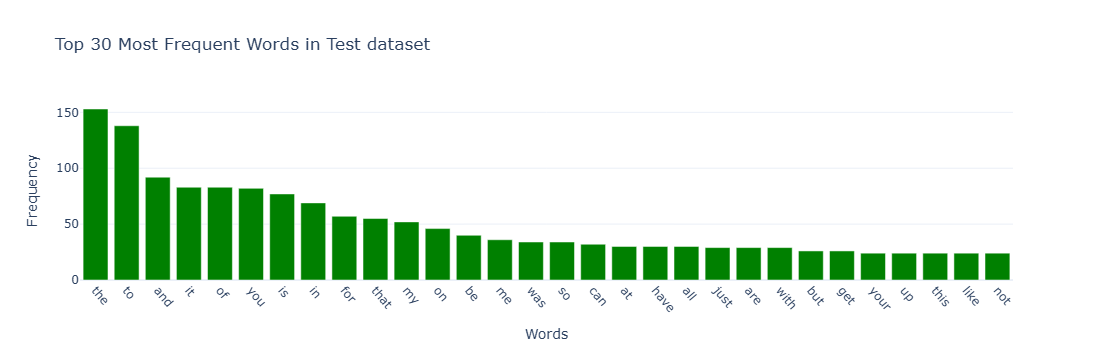

In [65]:
# Get the word frequencies in test dataset
count_vect = CountVectorizer()
test_df_counts = count_vect.fit_transform(test_df.text)
test_word_frequencies = np.asarray(test_df_counts.sum(axis=0))[0]

sorted_test_index = np.argsort(test_word_frequencies)[::-1][:30]
top30_words_test = count_vect.get_feature_names_out()[sorted_test_index]
top30_counts_test = test_word_frequencies[sorted_test_index]
print (top30_words_test)
print (top30_counts_test)

#Plot the word frequecy
import plotly.express as px
fig = px.bar(x = top30_words_test, y = top30_counts_test, 
    title=f"Top 30 Most Frequent Words in Test dataset", labels={'x': 'Words', 'y': 'Frequency'})
fig.update_traces(marker_color="green", textposition="outside")
fig.update_layout(xaxis_tickangle=50, template="plotly_white")
fig.show()

---
### <a id='toc1_5_2_'></a>[**1.2 Save data**](#toc0_)

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [66]:
# save to pickle file
train_df.to_pickle("./data/train_df.pkl") 
test_df.to_pickle("./data/test_df.pkl")

In [67]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./data/train_df.pkl")
test_df = pd.read_pickle("./data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### <a id='toc1_5_3_'></a>[**1.3 Exploratory data analysis (EDA)**](#toc0_)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [68]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

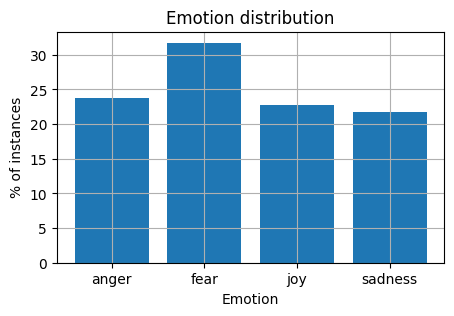

In [69]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## <a id='toc1_6_'></a>[**2. Feature engineering**](#toc0_)
### <a id='toc1_6_1_'></a>[Using Bag of Words](#toc0_)
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [70]:
from sklearn.feature_extraction.text import CountVectorizer

In [71]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [72]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [73]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [74]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [75]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [76]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [77]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [78]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [79]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

D:\Lab2\DM2025-Lab2-Exercise\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



(3613, 500)

In [80]:
train_data_BOW_features_500.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 4, 0, ..., 0, 0, 0]], dtype=int64)

In [81]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [82]:
"😂" in feature_names_500

True

---
##### <a id='toc1_6_1_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [83]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer (max_features = 1000)
tfidf_train = tfidf_vect.fit_transform(train_df['text'])
tfidf_train_feature_names = tfidf_vect.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

In [84]:
tfidf_vect = TfidfVectorizer (max_features = 1000, tokenizer=nltk.word_tokenize)
tfidf_train = tfidf_vect.fit_transform(train_df['text'])
tfidf_train_feature_names = tfidf_vect.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

---
## <a id='toc1_7_'></a>[**3. Model**](#toc0_)
### <a id='toc1_7_1_'></a>[**3.1 Decision Trees**](#toc0_)
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [85]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [86]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['fear', 'anger', 'anger', 'joy', 'sadness', 'fear', 'fear', 'joy',
       'anger', 'anger'], dtype=object)

---
## <a id='toc1_8_'></a>[**4. Results Evaluation**](#toc0_)

Now we will check the results of our model's performance

In [87]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.68


In [88]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [89]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [90]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

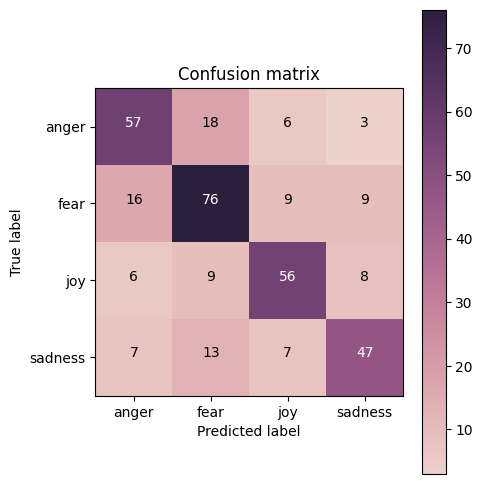

In [33]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
##### <a id='toc1_8_1_1_1_'></a>[**>>> Exercise 3 (Take home):**](#toc0_)
Can you interpret the results above? What do they mean?

#Answer here

The classification report helps identify whether the model is biased toward certain emotions. And as the video mentioned, the model didn't fit well with 'fear' although this type of emotion had higher amount than others.

The confusion matrix is used to compare the true emotion versus predicted emotion. The diagonal values (top-left → bottom-right) are correct predictions. The off-diagonal values are misclassifications.

On heatmap visualization, darker diagonal cells → model performs well on that class, and the darker off-diagonal cells → confusion between two emotions. Particularly, each emotion itself is more often predicted as itself than being predicted as other. However, the focused point should be which class is usually confused with the considered emotion. In this case, 'fear' is often confused with 'anger' (the cell (fear,anger) is darker than other cells (except the true predictions)). In other words, the words patterns for 'fear' text overlap more strongly with 'anger' vocabulary in the dataset.

One suggestion for this heatmap is that it should be visualized based on the percentage (or correlation) normalization so that the results can be interpret more exactly. In the figure above, although the number of true prediction of 'fear' is 76, which seemed the highest among 4 types of emotion, this 'highest' doesn't reflect the correct rank, in which the 'fear' and 'anger' precisions are on 66% while the 'joy' and 'sadness' are actually predicted more correctly with precisions are 72% and 70%.

In summary, the confusion matrix and heatmap help us understand where and why the model makes mistakes so that we can have appropriate methods to improve the model training

---
##### <a id='toc1_8_1_1_2_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

Training accuracy:  0.79
Testing accuracy:  0.7

Confusion Matrix:
[[55 15  5  9]
 [ 9 85  5 11]
 [11  6 56  6]
 [12 10  6 46]]


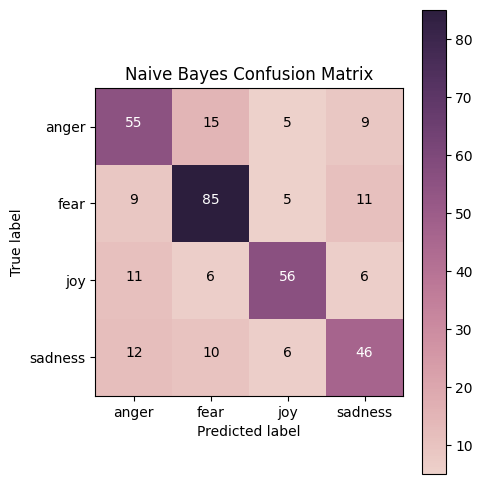

In [103]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#I'm using the same feature BOW_500
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)

y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

acc_train = accuracy_score (y_train, y_train_pred)
acc_test = accuracy_score (y_test, y_test_pred)

print('Training accuracy: ', round(acc_train,2))
print('Testing accuracy: ', round(acc_test,2))

cm = confusion_matrix (y_test, y_test_pred)
print('\nConfusion Matrix:')
print(cm)

my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Naive Bayes Confusion Matrix')


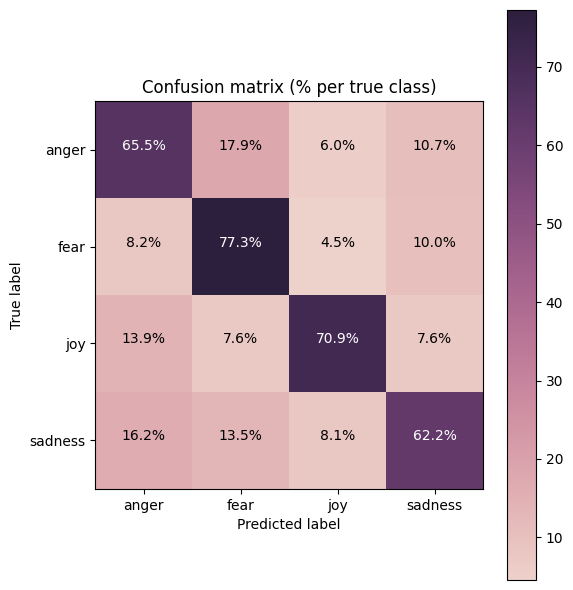

In [104]:
# Try drawing the heatmap in percentage normalization

# Normalize to percentage per true label
cm_row_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Function to plot row-normalized confusion matrix
def plot_confusion_matrix_percentage(cm, classes, title='Confusion matrix (% per true class)',
                                     cmap=sns.cubehelix_palette(as_cmap=True)):
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(6,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes,
           yticklabels=classes,
           title=title,
           xlabel='Predicted label',
           ylabel='True label')
    
    # Show percentage in each cell
    fmt = '.1f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt)+'%', 
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

# Plot the row-normalized confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix_percentage(cm_row_percentage, classes=my_tags)

---
##### <a id='toc1_8_1_1_3_'></a>[**>>> Exercise 5 (Take home):**](#toc0_)

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

#Answer here
- The DT model has much higher training accuracy (0.99) than NB (0.79), but the testing accuracy of DT model (0.68) is a bit lower and that of NB model (0.70), showing that the DT model has severe overfitting while the NB model is well fit. The DT almost memorizes the training data but doesn't generalize well to the new text. In contrast, NB model has a consistent performance and provide better generalization ability.
 
- The NB model relies on word probabilities, and did improve the prediction ability of 'fear', comparing to the DT model. DT model has more misclassification on 'fear' and 'anger', suggesting DT may be more sensitive to noise or rare words combinations

- The theoretical explaination
  + NB assumes independence among words. It works well in text classification because text features often act similar as independent signal (and in this case emotions have some distinctive keywords). NB is stable and generalizes well thanks to the word likelihoods it proposes.
  + DT model try to learn rules based on word patterns. The trees try to match exactly specific words. Therefore, with high-dimensional sparse text dataset, many words appear only few times and the tree can split on rare words, causing memorizing the trainining samples. Hence, training DT model for text data may lead to overfitting and low generalization

---

## <a id='toc1_9_'></a>[**5. Other things you can try**](#toc0_)

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to. 

In [105]:
#Try with TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer (limit to 1000 features as requested earlier)
tfidf_vect = TfidfVectorizer(max_features=1000)

# Fit on training text, transform both train and test
X_train_tfidf = tfidf_vect.fit_transform(train_df['text'])
X_test_tfidf = tfidf_vect.transform(test_df['text'])

print("TF-IDF shape:", X_train_tfidf.shape)

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

NB_tfidf = MultinomialNB()
NB_tfidf.fit(X_train_tfidf, train_df['emotion'])

y_pred_train_tfidf = NB_tfidf.predict(X_train_tfidf)
y_pred_test_tfidf = NB_tfidf.predict(X_test_tfidf)

print("TF-IDF Naive Bayes (Train Acc):", accuracy_score(train_df['emotion'], y_pred_train_tfidf))
print("TF-IDF Naive Bayes (Test Acc):", accuracy_score(test_df['emotion'], y_pred_test_tfidf))
print(classification_report(test_df['emotion'], y_pred_test_tfidf))


TF-IDF shape: (3613, 1000)
TF-IDF Naive Bayes (Train Acc): 0.8732355383337946
TF-IDF Naive Bayes (Test Acc): 0.7665706051873199
              precision    recall  f1-score   support

       anger       0.79      0.71      0.75        84
        fear       0.68      0.91      0.78       110
         joy       0.87      0.75      0.80        79
     sadness       0.85      0.64      0.73        74

    accuracy                           0.77       347
   macro avg       0.80      0.75      0.76       347
weighted avg       0.79      0.77      0.77       347



---
## <a id='toc1_10_'></a>[**6. Deep Learning**](#toc0_)

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![pic1.png](./pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


---
### <a id='toc1_10_1_'></a>[**6.1 Prepare data (X, y)**](#toc0_)

In [117]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [118]:
import keras

In [119]:
BOW_500.transform(test_df['text'])

<347x500 sparse matrix of type '<class 'numpy.int64'>'
	with 4103 stored elements in Compressed Sparse Row format>

---
### <a id='toc1_10_2_'></a>[**6.2 Deal with categorical label (y)**](#toc0_)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [120]:
# deal with label (string -> one-hot)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 1205       fear
1970       fear
3154    sadness
546       anger
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


In [121]:
y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)




## After convert
y_train[0:4]:
 [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


---
### <a id='toc1_10_3_'></a>[**6.3 Build model**](#toc0_)

In [122]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![pic2.png](./pics/pic2.png)

In [123]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)      ┃ Output Shape ┃ Param # ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ input_layer       │ (None, 500)  │       0 │
│ (InputLayer)      │              │         │
├───────────────────┼──────────────┼─────────┤
│ dense (Dense)     │ (None, 64)   │  32,064 │
├───────────────────┼──────────────┼─────────┤
│ re_lu (ReLU)      │ (None, 64)   │       0 │
├───────────────────┼──────────────┼─────────┤
│ dense_1 (Dense)   │ (None, 64)   │   4,160 │
├───────────────────┼──────────────┼─────────┤
│ re_lu_1 (ReLU)    │ (None, 64)   │       0 │
├───────────────────┼──────────────┼─────────┤
│ dense_2 (Dense)   │ (None, 4)    │     260 │
├───────────────────┼──────────────┼─────────┤
│ softmax (Softmax) │ (None, 4)    │       0 │
└───────────────────┴──────────────┴─────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

---
### <a id='toc1_10_4_'></a>[**6.4 Train**](#toc0_)

In [124]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3703 - loss: 1.3263 - val_accuracy: 0.4697 - val_loss: 1.2716
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6532 - loss: 0.9781 - val_accuracy: 0.6398 - val_loss: 0.9517
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7957 - loss: 0.5764 - val_accuracy: 0.6859 - val_loss: 0.8224
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8472 - loss: 0.4094 - val_accuracy: 0.6888 - val_loss: 0.7901
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8802 - loss: 0.3237 - val_accuracy: 0.6657 - val_loss: 0.8266
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9134 - loss: 0.2600 - val_accuracy: 0.6801 - val_loss: 0.8791
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9272 - loss: 0.2187 - val_accuracy: 0.6513 - val_loss: 0.9682
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9391 - loss: 0.1864 - val_accuracy: 0.

---
### <a id='toc1_10_5_'></a>[**6.5 Predict on testing data**](#toc0_)

In [125]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[3.3775554e-04, 9.9920553e-01, 3.2356336e-05, 4.2444907e-04],
       [9.9986184e-01, 1.6263002e-05, 1.1272989e-04, 9.0768262e-06],
       [7.8993672e-01, 2.1002458e-01, 2.6911544e-06, 3.6009897e-05],
       [3.1451157e-07, 9.0829868e-09, 9.9999821e-01, 1.4672829e-06],
       [4.6743907e-04, 1.2467288e-01, 8.8565389e-04, 8.7397403e-01]],
      dtype=float32)

In [126]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['fear', 'anger', 'anger', 'joy', 'sadness'], dtype=object)

In [127]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.65


In [128]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.370329,1.326280,0.469741,1.271639
1,1,0.653197,0.978077,0.639769,0.951666
2,2,0.795738,0.576417,0.685879,0.822391
3,3,0.847218,0.409368,0.688761,0.790131
4,4,0.880155,0.323680,0.665706,0.826611
5,5,0.913368,0.259955,0.680115,0.879100
6,6,0.927207,0.218666,0.651297,0.968200
7,7,0.939109,0.186355,0.659942,0.986461
8,8,0.952671,0.157848,0.671470,1.072671
9,9,0.958760,0.140145,0.668588,1.092911


---
##### <a id='toc1_10_5_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![pic3.png](./pics/pic3.png)  ![pic4.png](./pics/pic4.png)


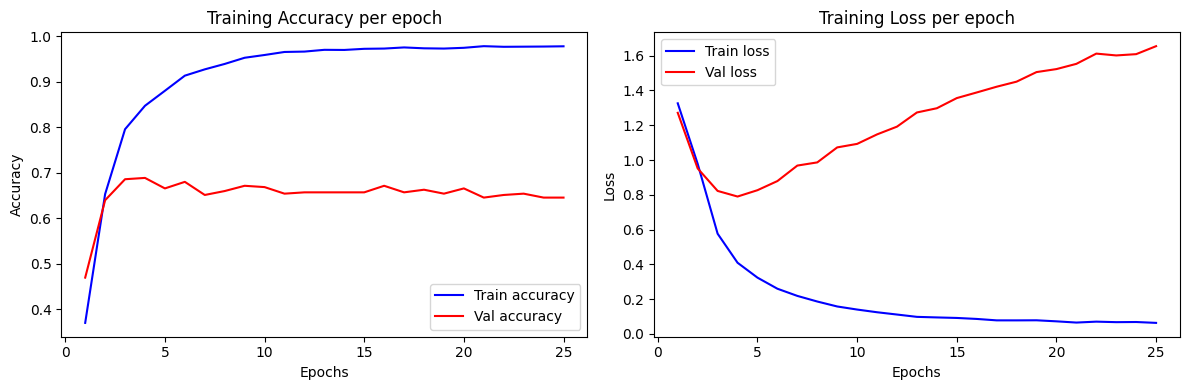

In [131]:
# Answer here

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,4))
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Train accuracy', color='blue')
plt.plot(epochs, val_acc, label='Val accuracy', color='red')
plt.title('Training Accuracy per epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Train loss', color='blue')
plt.plot(epochs, val_loss, label='Val loss', color='red')
plt.title('Training Loss per epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

---

### <a id='toc1_10_6_'></a>[Note](#toc0_)

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### <a id='toc1_10_7_'></a>[More Information for your reference](#toc0_)

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## <a id='toc1_11_'></a>[**7. Word2Vector**](#toc0_)

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

---
### <a id='toc1_11_1_'></a>[**7.1 Prepare training corpus**](#toc0_)

In [132]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
1205,20348,@BraveHermione_ + and gives it to hear] 'Pleas...,"[@, BraveHermione_, +, and, gives, it, to, hea..."
1970,21113,Some serious hip shaking going on tonight 😜,"[Some, serious, hip, shaking, going, on, tonig..."
3154,40327,Absolutely can not believe the generosity pour...,"[Absolutely, can, not, believe, the, generosit..."
546,10546,@WestonKoury so leafy can roast the Pokemon go...,"[@, WestonKoury, so, leafy, can, roast, the, P..."
3473,40646,@wabermes The @RavalliRepublic had a good one ...,"[@, wabermes, The, @, RavalliRepublic, had, a,..."


In [133]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['@', 'BraveHermione_', '+', 'and', 'gives', 'it', 'to', 'hear', ']', "'Please", '..', 'I', 'can', 'tell', 'you', 'anything', 'if', 'you', 'want', 'to', 'listen', '.', 'maybe', 'you', "'re", 'dont', 'afraid', 'anymore', 'of', 'me', '+']),
       list(['Some', 'serious', 'hip', 'shaking', 'going', 'on', 'tonight', '😜']),
       list(['Absolutely', 'can', 'not', 'believe', 'the', 'generosity', 'pouring', 'out', 'for', 'us', ',', 'but', 'Id', 'give', 'everything', 'I', 'have', 'for', 'Nick', 'to', 'be', 'healthy', 'and', 'happy', '.', '#', 'lost'])],
      dtype=object)

---
### <a id='toc1_11_2_'></a>[**7.2 Training our model**](#toc0_)

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [134]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

---
### <a id='toc1_11_3_'></a>[**7.3 Generating word vector (embeddings)**](#toc0_)

In [135]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.41954538,  0.41018233,  0.10282025,  0.07057181, -0.23810318,
       -1.1113353 ,  0.6135909 ,  1.227716  , -0.03121124, -0.607624  ,
       -0.5151195 , -0.9207321 , -0.4202155 ,  0.60998577, -0.17749204,
       -0.7021675 ,  0.2759044 , -0.2202682 ,  0.21445046, -1.0615163 ,
        0.6548912 ,  1.0982262 ,  0.635845  ,  0.21213989,  0.6629877 ,
        0.20812248, -1.0220621 ,  0.55478096, -0.54947335, -0.0052686 ,
        0.24094656, -0.19552961,  0.4176598 , -0.5275094 ,  0.09506579,
        0.7390513 ,  0.53049517, -0.19828437, -0.63046384, -0.16302708,
       -0.15185392,  0.11016933, -0.18627286,  0.3720813 ,  0.6035503 ,
       -0.15025736, -0.49435073,  0.23565705,  0.32344416,  0.19148813,
       -0.13639411, -0.760249  ,  0.22703786, -0.5414385 , -0.67449397,
       -0.37210545,  0.3109569 , -0.04283918,  0.01028627,  0.14267924,
        0.07456504, -0.6093001 ,  0.9987233 ,  0.5490294 , -0.48302957,
        1.1245581 ,  0.21524881,  0.63115335, -1.0666218 ,  0.83

In [136]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[("'you", 0.9205702543258667),
 ('Makes', 0.9153096079826355),
 ('infuriate', 0.9105970859527588),
 ('birthday', 0.9067966341972351),
 ('Be', 0.9061188697814941),
 ('memories😊', 0.9042340517044067),
 ('smile', 0.9040957093238831),
 ('bday', 0.9030011892318726),
 ('See', 0.9027133584022522),
 ('plz', 0.9022659063339233)]

---
### <a id='toc1_11_4_'></a>[**7.4 Using a pre-trained w2v model**](#toc0_)

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### <a id='toc1_11_4_1_'></a>[(1) Download model by yourself](#toc0_)

Download from this link: [Kaggle | Google News Vectors](https://www.kaggle.com/datasets/didiersalazar/google-news-vectors)

Copy the data `GoogleNews-vectors-negative300.bin` into the following folder directory: `GoogleNews/`

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [138]:
from gensim.models import KeyedVectors
# IMPORTANT: Please make sure that you have correctly downloaded the file and put it in the correct directory
## Note: this model is huge, this will take some time ...
model_path = "./GoogleNews/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### <a id='toc1_11_4_2_'></a>[(2) Using gensim api](#toc0_)

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [139]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

[==================================================] 100.0% 104.8/104.8MB downloaded
load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

---
### <a id='toc1_11_5_'></a>[**7.5 king + woman - man = ?**](#toc0_)

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [140]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

---
##### <a id='toc1_11_5_1_1_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


##### Answer here

We may have some methods that can be used to solve it. 
    - Mean of word vectors: compute the average of all word vectors in the sentence to get 1 vector for a sentence with the same dimensionality as word vectors. It's fast and works well with small dataset, but may lose the word order.

    - TF-IDF weighted mean: weigh the average word vectors by importance to turn in words that are more distinctive (high weight). This way can pick the important words in the sentence, but ignores word order.
        
    - Sequence + LSTM/GRU: treat whole sentence as a sequence of word vectors to feed into LSTM, GRU, RNN, or transformer. This method needs padded sentences and more memmory, so it can maintain word order and context

    - Doc2Vec: embed at the sentence level directly, but it needs training and more complex

    - Transformer embeddings: can provide contextual embeddings, good performance, but heavy computation needed

In [146]:
# For example, use Keras LSTM with Word2Vec embeddings

from keras.preprocessing.sequence import pad_sequences
import numpy as np

# Convert each token to its Word2Vec vector
def tokens_to_vectors(tokens, w2v_model):
    vectors = [w2v_model.wv[word] for word in tokens if word in w2v_model.wv]
    return vectors

# Assume that train_tokens is list of token lists per sentence
train_vectors = [tokens_to_vectors(tokens, w2v_model) for tokens in train_tokens]
test_vectors  = [tokens_to_vectors(tokens, w2v_model) for tokens in test_tokens]

# Decide max_seq_len (e.g., longest sentence or fixed)
max_seq_len = max(len(seq) for seq in train_vectors)
embedding_dim = w2v_model.vector_size

# Pad sequences with zeros to the same length
def pad_vector_sequence(seq, max_len, embedding_dim):
    if len(seq) >= max_len:
        return seq[:max_len]
    else:
        # pad with zeros
        padding = [np.zeros(embedding_dim)] * (max_len - len(seq))
        return seq + padding

X_train_embedded = np.array([pad_vector_sequence(seq, max_seq_len, embedding_dim) for seq in train_vectors])
X_test_embedded  = np.array([pad_vector_sequence(seq, max_seq_len, embedding_dim) for seq in test_vectors])

print("X_train_embedded shape:", X_train_embedded.shape)  # (num_samples, max_seq_len, embedding_dim)



X_train_embedded shape: (3613, 30, 100)


---
## <a id='toc1_12_'></a>[**8. Clustering: k-means**](#toc0_)

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### <a id='toc1_12_1_1_'></a>[Basic concept](#toc0_)

![pic5.png](./pics/pic5.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [147]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [148]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


![pic6.png](./pics/pic6.png)

In [149]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1])

In [150]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0])

---
## <a id='toc1_13_'></a>[**9. High-dimension Visualization: t-SNE and UMAP**](#toc0_)

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

![pic7.png](./pics/pic7.png)

source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

And also like this for UMAP:

![pic9.png](./pics/pic9.png)

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 
https://umap-learn.readthedocs.io/en/latest/

---
### <a id='toc1_13_1_'></a>[**9.1 Prepare visualizing target**](#toc0_)

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [151]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


---
### <a id='toc1_13_2_'></a>[**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc0_)

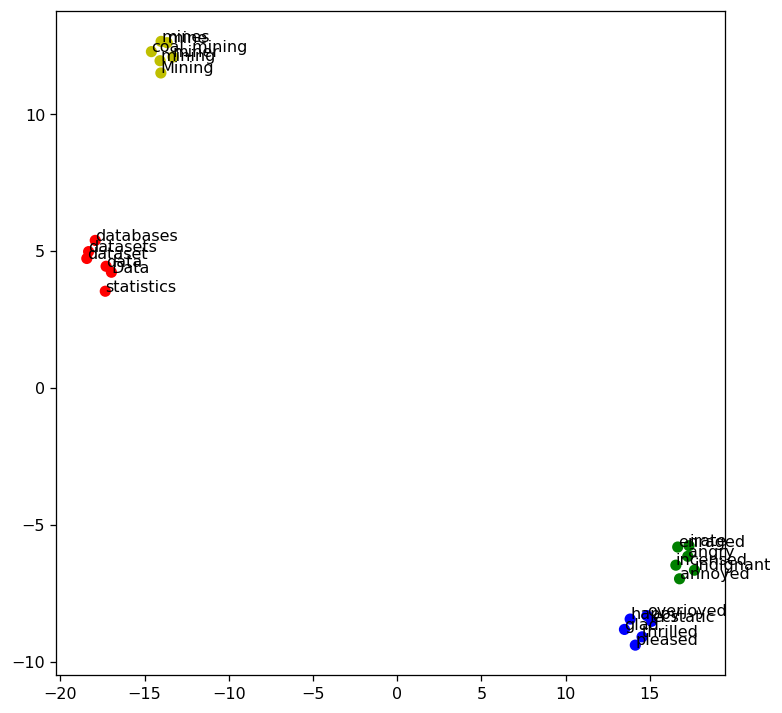

In [152]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

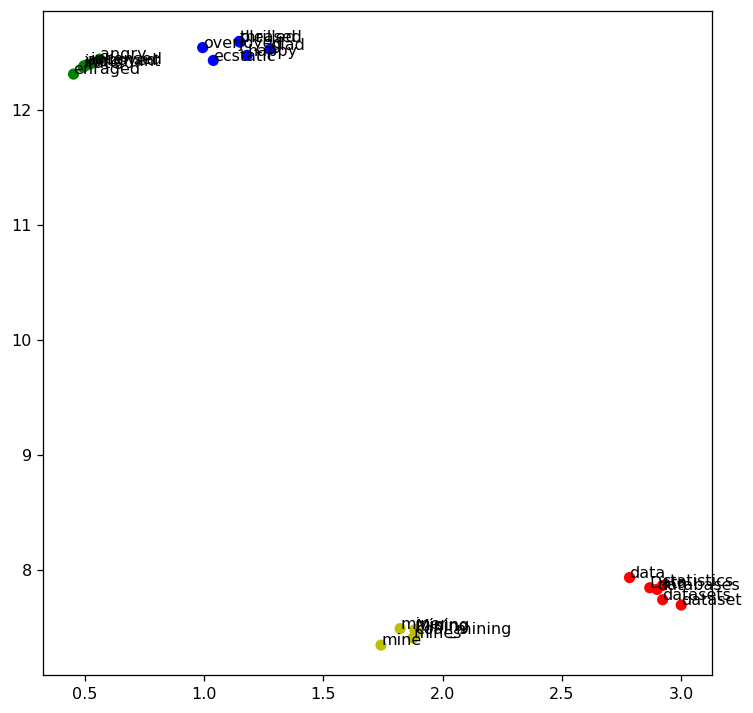

In [153]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()


---
##### <a id='toc1_13_2_1_1_'></a>[**>>> Exercise 8 (Take home):**](#toc0_)

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

Target words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry', 'sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet', 'fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']
Colors:  ['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r

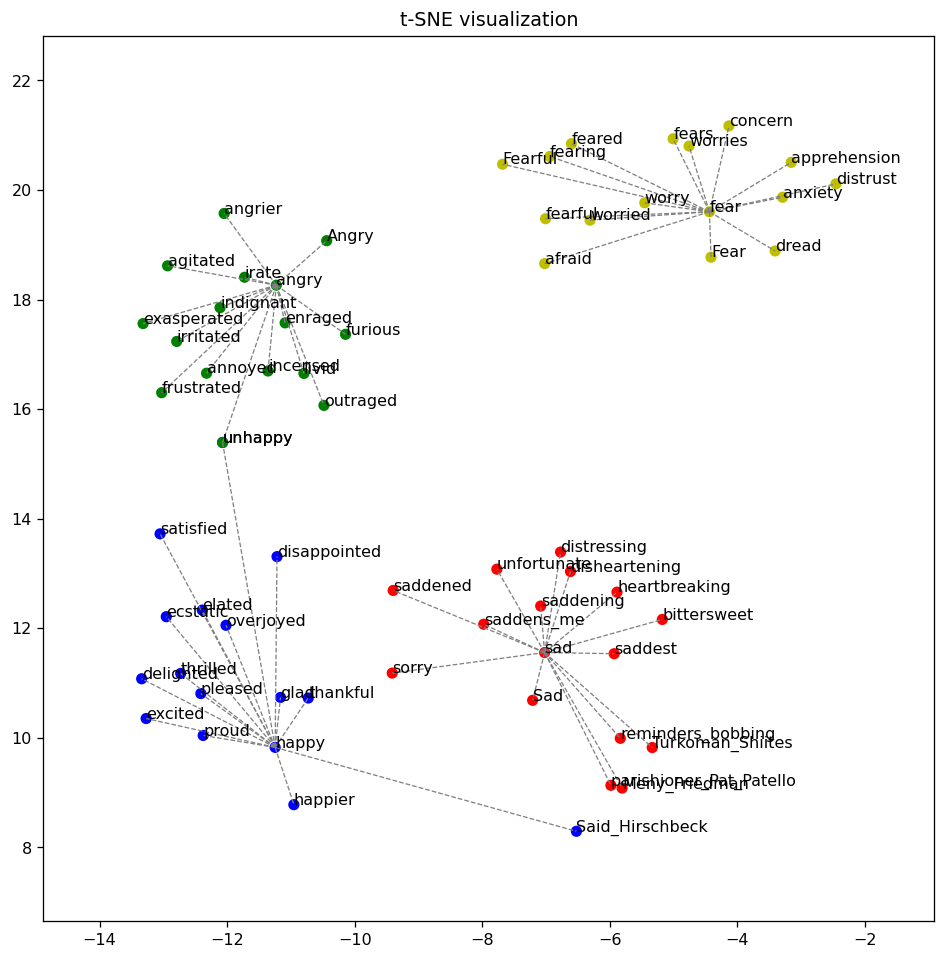

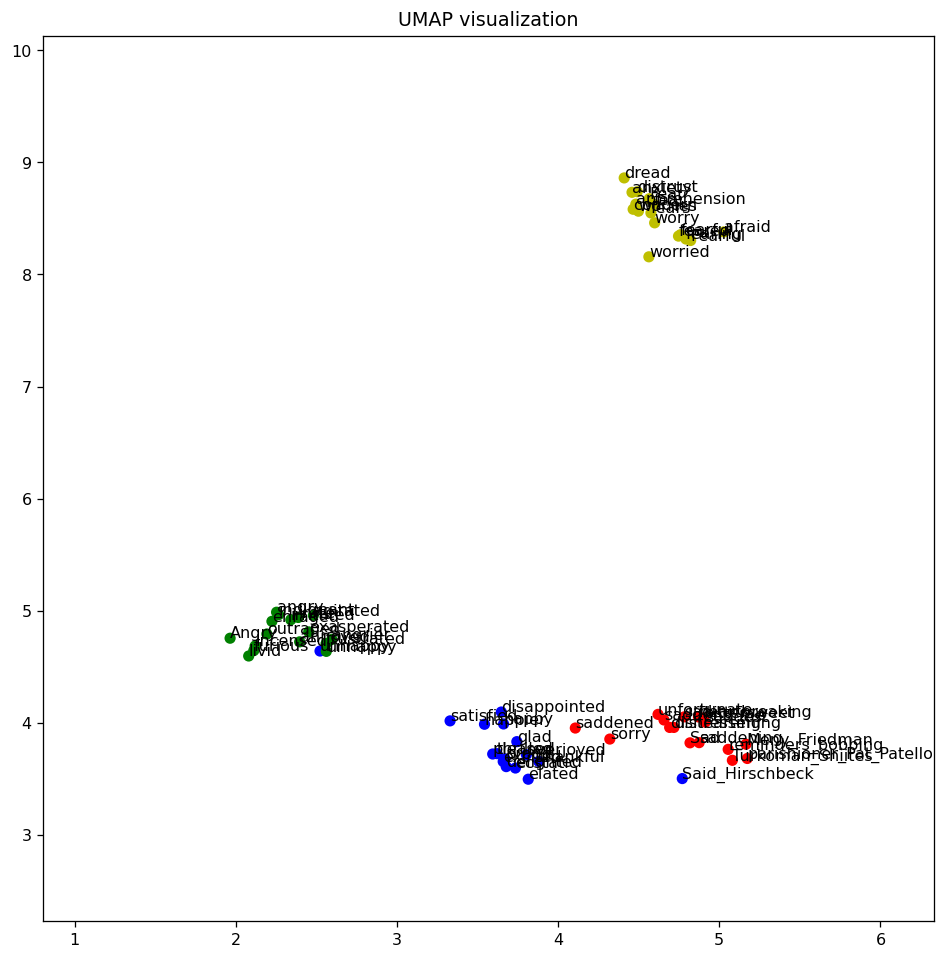

In [166]:
# Answer here

# The number of words related to each emotion
topn = 15

# Get the similar words for each term
happy_words = ['happy'] + [word for word, sim in w2v_google_model.most_similar ('happy', topn = topn)]
angry_words = ['angry'] + [word for word, sim in w2v_google_model.most_similar ('angry', topn = topn)]
sad_words = ['sad'] + [word for word, sim in w2v_google_model.most_similar ('sad', topn = topn)]
fear_words = ['fear'] + [word for word, sim in w2v_google_model.most_similar ('fear', topn = topn)]

target_words = happy_words + angry_words + sad_words + fear_words

# Coloring
cn = topn + 1
colors = ['b']*cn + ['g']*cn + ['r']*cn + ['y']*cn  # b,g,r,n = happy, angry, sad, fear

print('Target words: ', target_words)
print('Colors: ', colors)

# Word vectors
all_word = list(w2v_google_model.index_to_key)
word_train = target_words + all_word[:200]   #combine the target words and 200 additional context words
# embedding
X_train = w2v_google_model[word_train]



# t-SNE visualization
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE (n_components = 2, metric = 'cosine' , random_state = 25)
X_tsne = tsne.fit_transform (X_train)

plt.figure (figsize = (10,10), dpi = 115)

plt.scatter (X_tsne [:len(target_words), 0],
             X_tsne [:len(target_words), 1],
             c = colors)
for label, x, y in zip (target_words, X_tsne [:len(target_words), 0], X_tsne [:len(target_words), 1]):
    plt.annotate (label, xy = (x, y) , xytext = (0,0) , textcoords = 'offset points')

# Draw connecting lines to the central word of each group 
group_lengths = [len(angry_words), len(happy_words), len(sad_words), len(fear_words)]
group_starts = [0, group_lengths[0], group_lengths[0]+group_lengths[1],
                group_lengths[0]+group_lengths[1]+group_lengths[2]]

for start, length in zip(group_starts, group_lengths):
    center_x, center_y = X_tsne[start, 0], X_tsne[start, 1]  # center word
    for i in range(start+1, start+length):  # connect to related words
        plt.plot([center_x, X_tsne[i, 0]], [center_y, X_tsne[i, 1]], 
                 linestyle='--', linewidth=0.8, color='gray')

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
plt.xlim(xmin - 1, xmax + 1)
plt.ylim(ymin - 1, ymax + 1)
plt.title ('t-SNE visualization')
plt.show()





# UMAP visualization
import umap.umap_ as umap

umap_model = umap.UMAP (n_components = 2, metric = 'cosine', random_state = 25)
X_umap = umap_model.fit_transform (X_train)

plt.figure (figsize = (10, 10), dpi = 115)
plt.scatter (X_umap [:len(target_words), 0],
             X_umap [:len(target_words), 1],
             c = colors)
for label, x, y in zip (target_words,
                        X_umap [:len(target_words), 0],
                        X_umap [:len(target_words), 1]):
    plt.annotate (label, xy = (x,y), xytext = (0,0) , textcoords = 'offset points')
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
plt.xlim(xmin - 1, xmax + 1)
plt.ylim(ymin - 1, ymax + 1)
plt.title ('UMAP visualization')
plt.show()

#### Compare the differences between t-SNE and UMAP graphs

- t-SNE gives the graph with groups locating near to each other, slightly overlap. It focuses on maintaining local neighborhood structure (words clustering together), so the distant clusters are not very clear and meaningful. So, t-SNE is good for seeing clear clusters but spacing is arbitary
- UMAP clusters 4 groups more separated. It shows both local and even global structure among clusters. UMAP focuses on reflecting distances ralated to conceptual proximity among clusters

---